In [87]:
#Importando librerias 
import pandas as pd
import numpy as np 

In [88]:
#Importando la data 
index = pd.read_csv("Index2018.csv")
df = index.copy() #Archivo sin transformar

In [89]:
#Examinar datos 
df.head()
#df solo muestra todo si es largo incio y fin
#las 4 columnas: representan datos de series temporales para los precios de cierre de 4 indices de mercado spx500 empresas que incluye: bolsa de EEUU, dax30:Bolsa alemana, ftse:londres, nikkei:japonesa 

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
df.describe() #Para comprender el conjunto de datos
#Nos muestra información resumida de las var numericas, count (numero de observaciones registradas por var)
#Cuartil del 50% representa tambien la mediana, std(desviación estandar) Mean:valor promedio de todos los datos de la variable )

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
#Para valores faltantes missing value. Para determinar si hay valores faltantes
df.isna() #False no hay, true si hay.

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
#Cuando no se pueden observar todos los valores de la tabla sumamos 
df.isna().sum()
#Para sumar solo 1 serie: df.spx.isna().suma()
#false lo traduce a 0, y el true a 1, si la suma da 0, no hay ningun faltante 

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [90]:
#Graficar una serie de tiempo
#importamos matplotlib
import matplotlib.pyplot as plt 

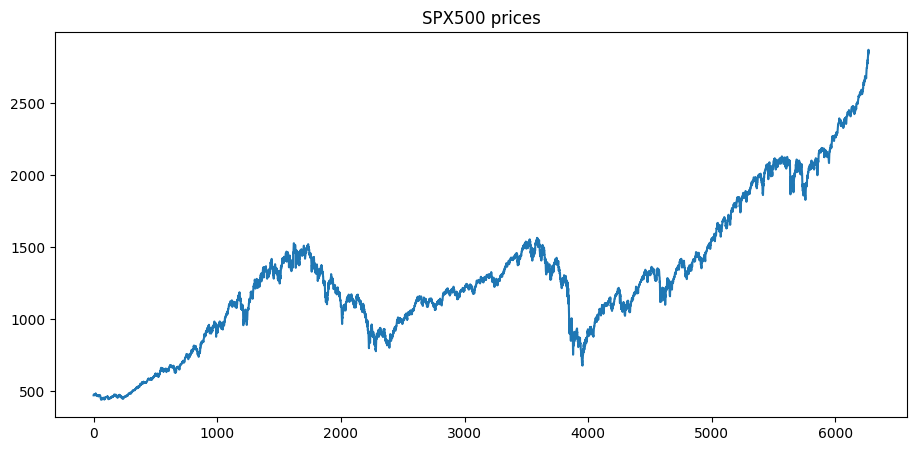

In [91]:
#figsize (hori, vertical) tamaño figura
df.spx.plot(figsize=(11,5), title = "SPX500 prices")
plt.show()
#periodo 0: primera fecha del conjunto de datos, aun no muestra la fecha


<Axes: title={'center': 'FTSE100 prices'}>

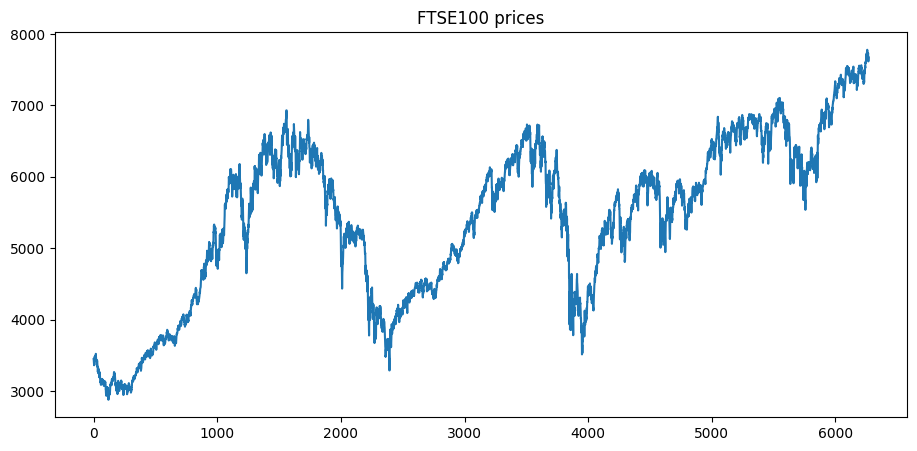

In [92]:
df.ftse.plot(figsize= (11,5), title= "FTSE100 prices")
#La tendencia es parecida, por la similitud entre el mk bursatil de EEUU y Reino Unido

Text(0.5, 1.0, 'S&P500 vs FTSE100')

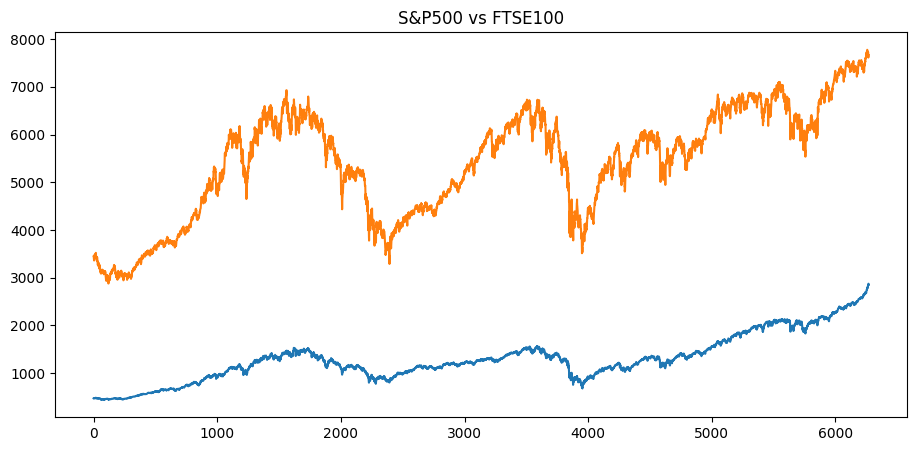

In [93]:
#Para analizarlo debemos poner las 2 series en un mismo grafico, para ello las dibujamos en la misma celda una detras de otra y las llamamos juntas en titulo 
df.spx.plot(figsize= (11,5), title= "S&P500 prices")
df.ftse.plot(figsize= (11,5), title= "FTSE prices")
plt.title( "S&P500 vs FTSE100")
# plt.show() #primer variable es azul

In [94]:
# Se deben mirar los retornos compuestos, debemos ver la densidad de los datos, que valores tienen mas probabilidad de ocurrir con QQ.PLOT
# QQplot: Quantile - Quantile, debemos primero importar libreria
import scipy.stats
# Se utiliza para explicar si un conjunto de datos se distribuye de cierta manera, la grafica muestra si los datos se ajustan a una distribución normal a menos que se especifique de otra manera 


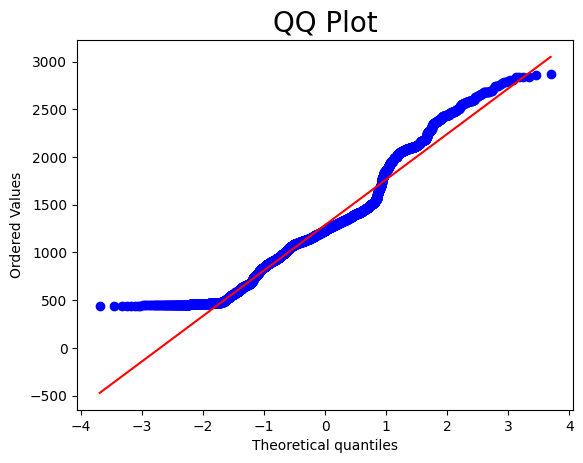

In [95]:
#Utilizamos la función probplot( serie analizar, plot= tipo de grafico que queremos)
scipy.stats.probplot(df.spx, plot = plt)
plt.title("QQ Plot", size= 20)
plt.show()

#El QQplot toma todos los valores que una variable puede tomar, los ordena y entonces:
# el eje Y, va a expresar los  valores de precio que toma esa variable ordenados del min al max precio
# el eje X, representara los cuantiles teoricos del cojunto de datos, los cuantiles miden a cuantas deesviaciones estandar de la media estan los valores, o cuan alejados de la media estan los valores 
# la linea roja representa el patron que deben seguir los datos si se distribuyen normalmente, estos no se distribuyen normalmente al inicio estan concentrado en 500

In [96]:
# TRANSFORMACIÓN DE DATOS: Convertir un dataSet en una serie de tiempo
# Conversion fechas de string a date con la funcion de pandas
# por defecto asume mes-dia-año como no es asi en este caso va primero el dia lo especificamos con ,dayfirst= true
df.date = pd.to_datetime(df.date, dayfirst= True)
df.date

0      1994-01-07
1      1994-01-10
2      1994-01-11
3      1994-01-12
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]

In [97]:
# Fecha como indice 
# Cada fecha debe corresponder a un periodo de tiempo, debemos usar los periodos de tiempo asociados como indices
df.set_index("date", inplace=True) #como ya la habia vuelto indice salia error porque ya "date" era indice y no variable , sin embargo ya esta puesta como indice 
# YA PODEMOS UTILIZAR DATE PARA DESCRIBIR PERIODOS DE TIEMPO ESPECIFICOS 


In [98]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [99]:
# FRECUENCIA 
#La frecuencia debe ser constante, vamos a configurar la frecuencia de una serie para convertirla en una serie de tiempo
#Para asignar la frecuencia del conjunto llamamos le metodo asfreq
df = df.asfreq('d') #que me considere como una frecuencia ('d': indica diario), 'h' cada hora se registran los datos, 'w' weekly semanal, 'm' monthly mensual, 'a' anual una vez al año 
#datos de cierre de precio diario

In [100]:
df #Podemos encontrar ahora datos faltantes NaN para los días que no hay registro, en este caso no hay registro para los dias sabados y domingos  

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [101]:
#Estos nuevos periodos diarios no tiene en este caso sentido registrarlos
# El metodo asfreq permite el parametro 'b' que se refiere a bussiness days, días laborables deja afuera festivos 
df= df.asfreq('b') 
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [102]:
# FORMAS DE TRATAR CON DATOS FALTANTES
df.isna().sum() #En este caso faltan 8 fechas por serie 

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [103]:
#Para completarlo usamos el metodo fillna (rellena los NaN) por ejemplo para transformar la variable debemos guardar la transformación en la var que transformaremos
df.spx = df.spx.fillna(method='ffill')
# Metodo: front filling -relleno frontal le va asignar al valor faltante el valor del periodo posterior
#back filling: periodo anterior ('bfiil')
df.ftse = df.ftse.fillna(method='bfill')
df.nikkei= df.nikkei.fillna(method='bfill')
#Para asignar el valor promedio a los faltantes apra datos regulares se suele utilizar 
df.dax = df.dax.fillna(value= df.dax.mean()) #en series no es apropiado a menos que todos los valores fluctuaran alrededor de la media
#Comprobamos
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [104]:
# Simplificando dataSet: En este caso solo analizaremos la serie de s&p500
#Crearemos columna de valor de mercado asignadole los valor spx
df['market_value']= df.spx

In [105]:
df

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,469.900000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,475.270000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,474.130000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,474.170000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,2839.130362
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2839.253031


In [106]:
#Eliminamos no
del df['spx']
del df['dax']
del df['nikkei']
del df['ftse']
df

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [107]:
#CONJUNTO DE ENTRENAMIENTO Y PRUEBA: Splitting the data: division de los datos 
# Para llevar acabo un aprendizaje automatico exitoso, objetivo es tener la opcion de
# introducir nueva informacion en el modelo y comparar sus predicciones con los valores reales
#  que ya conocemos es decir con los datos de entrenamiento y con los datos de prueba
#  se introduce una nueva informacion que el modelo no conoce 


In [108]:
#Para dividir un conjunto de datos cualquiera en un dataset usual barajariamos los datos
#Es decir se haria de manera aleatoria y se cogeria un porcentaje como datos de entrenamiento y otro de prueba
#1. Se Barajan los datos antes de dividirlos para que los 2 conjuntos se igualmente representativos

#Sin embargo: Los datos de series temporales dependen de mantener un orden cronologico, si barajamos perdemos esa relacion temporal, por lo tanto no se realiza bajarada
#Conjunto de entrenamiento inicio hasta un periodo y prueba el resto hasta final
#que porcentaje de entrenamiento 80% - 20% o 70%-30%



In [109]:
# Para dividir los datos usamos el metodo iloc nos selecciona cierta cantidad de datos hasta llegar a un indice, momento, fila determinado
#80%-20%
#Cuanta cantidad representa aprox el 80% de los datos
#total de datos con lenght(len) de tamaño o longitud del dataSet multiplicado por el 80%,
# como puede dar un numero con coma, aplicamos funcion int para recibirlo en entero
size = int(len(df)*0.8) #definimos los datos de entrenamiento
size

5021

In [110]:
#Ahora selecciono con (divido los datos con )ILOC[:size] : -> desde el primero, hasta (size) 
#si size ejemplo es de tamaño 5021hasta ese numero va:
df_train = df.iloc[:size]

In [111]:
df_train

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [112]:
#Y para el conjunto de datos de prueba tomo de inicio el tamaño de size 5021 ejemplo hasta el final con -> :
df_test = df.iloc[size:]

In [113]:
df_test

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [117]:
#Comprobacion de solapamiento:No hay dato final de train no se solapa con dato inicial de test son diferentes y consecutivos
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [118]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [119]:
#FIN